**In this notebook, we train an MLP to classify images from the MNIST database.**


---



## 1. Load MNIST Database


In [2]:
from keras.datasets import mnist


# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'The MNIST database has a training set of {len(X_train)} examples.')
print(f'The MNIST database has a test set of {len(X_test)} examples.')

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


## 2. Visualize the First Six Training Images

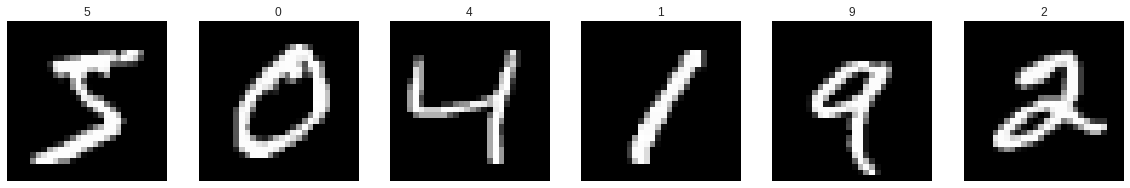

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
  ax = fig.add_subplot(1,6,i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i],cmap='gray')
  ax.set_title(str(y_train[i]))


## 3. View an Image in More Detail

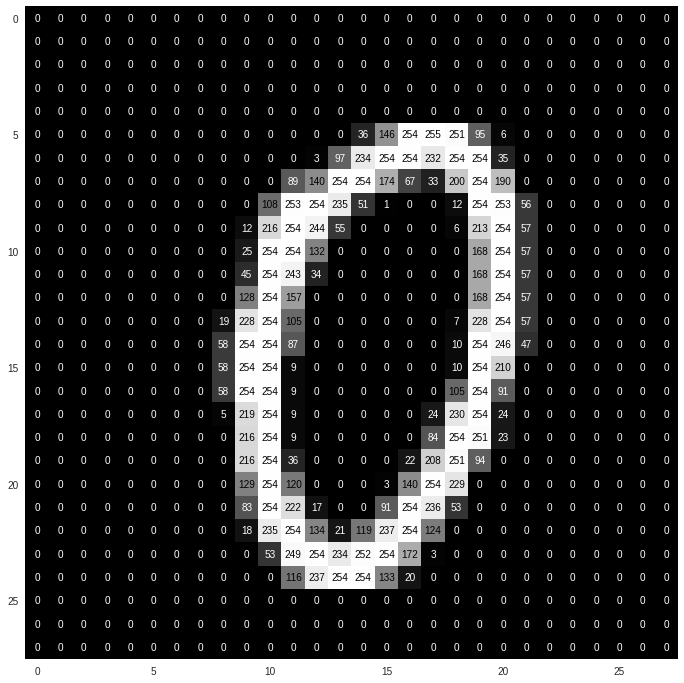

In [21]:
def visualize_input(img,ax):
  ax.imshow(img,cmap='gray')
  width, height = img.shape
  thresh = img.max()/2.5
  
  for x in range(width):
    for y in range(height):
      ax.annotate(str(img[x][y]), xy=(y,x), 
                  horizontalalignment='center',
                  verticalalignment='center', 
                  color = 'white' if img[x][y] < thresh else 'black')
  ax.grid(False)




fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[1000], ax)


## 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [0]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test  = X_test.astype('float32')/255

## 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [0]:
from keras.utils import to_categorical

# one-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## 6. Define the Model Architecture

In [33]:
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape= X_train.shape[1:]))
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(200, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'sigmoid'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


## 7. Compile the Model

In [0]:
# compile the model
model.compile(optimizer= 'RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

## 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [42]:
# evaluate test accuracy
score  = model.evaluate(X_test, y_test,verbose = 0)
accuracy = score[1]*100

print(f'Test accuracy: {accuracy}')

Test accuracy: 10.67


## 9. Train the Model

In [43]:
from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
# train the model
model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2,callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.3501 - acc: 0.8951 - val_loss: 0.1273 - val_acc: 0.9617

Epoch 00001: val_loss improved from inf to 0.12729, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.1351 - acc: 0.9595 - val_loss: 0.1023 - val_acc: 0.9692

Epoch 00002: val_loss improved from 0.12729 to 0.10233, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 7s 154us/step - loss: 0.0951 - acc: 0.9717 - val_loss: 0.1004 - val_acc: 0.9700

Epoch 00003: val_loss improved from 0.10233 to 0.10042, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 7s 148us/step - loss: 0.0750 - acc: 0.9774 - val_loss: 0.1059 - val_acc: 0.9719

Epoch 00004: val_loss did not improve from 0.10042
Epoch 5/10
48000/48000 [==============================] - 7s 140u

## 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

## 11. Calculate the Classification Accuracy on the Test Set

In [49]:
# evaluate test accuracy
score  = model.evaluate(X_test, y_test,verbose = 0)
accuracy = score[1]*100

print(f'Test accuracy: {accuracy:.4}')

Test accuracy: 98.01
